In [1]:
import pandas as pd
import math
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as plt
import csv

from scipy.stats import gaussian_kde
from scipy.stats import powerlaw

In [2]:
df = pd.read_csv('allgraph.csv', sep='\t', header=None, encoding='utf-8', engine='python')

In [3]:
graph = df.rename(columns={0:'KEYWORD',1:'POSITION',2:'SERP'})

In [4]:
weight = {1:1,2:1,3:1,4:0.85,5:0.6,6:0.5,7:0.5,8:0.3,9:0.3,10:0.2,11:0.15,12:0.15,13:0.10,14:0.10,15:0.08,16:0.05,17:0.03,18:0.02,19:0.01,20:0.009}
graph['POSITION'] = graph['POSITION'].replace(weight, regex=True)

In [5]:
set_k = set(graph['KEYWORD'])
set_s = set(graph['SERP'])

In [6]:
authority = {}
hub = {}

for elem in set_k:
    hub[elem] = 0
    
for elem in set_s:
    authority[elem] = 0

In [7]:
#iterazione multipla dell'algoritmo HITS per osservare il valore di k in cui l'algoritmo inizia a convergere

delta_list = []

for k in range(1,31):
    
    sum_a = 0
    
    #calcolo score authority (influenzato dalla posizione della serp rispetto la keyword)
    for row in graph.itertuples(index=True, name='Pandas'):
        serp = row.SERP
        pos=row.POSITION
        key = row.KEYWORD
        if(k==1):
            authority[serp] = authority[serp] + pos
            sum_a = sum_a + authority[serp]
        else:
            authority[serp] = authority[serp] + hub[key]
            sum_a = sum_a + authority[serp]
    tot_a = 0

    for key in authority.keys():
        tot_a = tot_a + (authority[key]**2)

    tot_a = math.sqrt(tot_a)

    for key in authority.keys():
        authority[key] = round((authority[key]/tot_a),6)
        sum_a = sum_a + authority[key]

    sum_h = 0
    
    #calcolo score hub (influenzato dallo score dell'authority a cui esso punta)
    for row in graph.itertuples(index=True, name='Pandas'):
        serp = row.SERP
        key = row.KEYWORD
        hub[key] = hub[key] + authority[serp]
        sum_h = sum_h + hub[key]
        
    tot_h = 0
    for key in hub.keys():
        tot_h = tot_h + (hub[key]**2)

    tot_h = math.sqrt(tot_h)

    for key in hub.keys():
        hub[key] = round((hub[key]/tot_h),6)
        sum_h = sum_h + hub[key]
    
    avg_a = sum_a/len(authority)
    avg_h = sum_h/len(hub)
    
    d = round((avg_h - avg_a),3)
    delta_list.append(d)
    print("ITERAZIONE: ",k," DELTA: ",d, "SUM_A: ", sum_a , "SUM_H: ", sum_h )

ITERAZIONE:  1  DELTA:  -180830.453 SUM_A:  13168450817.016563 SUM_H:  2947772.7539842515
ITERAZIONE:  2  DELTA:  -1245.967 SUM_A:  92547255.96224923 SUM_H:  2951097.833291013
ITERAZIONE:  3  DELTA:  -1245.796 SUM_A:  92531973.43213347 SUM_H:  2946541.7487487034
ITERAZIONE:  4  DELTA:  -1245.475 SUM_A:  92508268.35581338 SUM_H:  2945926.2886321573
ITERAZIONE:  5  DELTA:  -1245.423 SUM_A:  92504379.90818486 SUM_H:  2945844.4325659596
ITERAZIONE:  6  DELTA:  -1245.414 SUM_A:  92503718.71661834 SUM_H:  2945833.697898252
ITERAZIONE:  7  DELTA:  -1245.413 SUM_A:  92503651.40828314 SUM_H:  2945829.9376751026
ITERAZIONE:  8  DELTA:  -1245.413 SUM_A:  92503640.83089718 SUM_H:  2945831.1209421917
ITERAZIONE:  9  DELTA:  -1245.413 SUM_A:  92503638.16019407 SUM_H:  2945830.4105771156
ITERAZIONE:  10  DELTA:  -1245.413 SUM_A:  92503637.09192537 SUM_H:  2945830.6487290435
ITERAZIONE:  11  DELTA:  -1245.413 SUM_A:  92503641.45210353 SUM_H:  2945830.6489090472
ITERAZIONE:  12  DELTA:  -1245.413 SUM_A

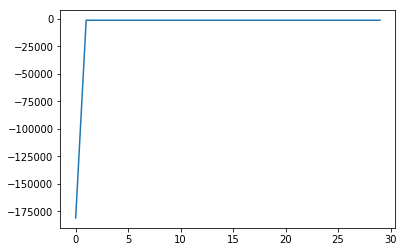

In [8]:
plt.plot(delta_list)

In [14]:
#esecuzione algoritmo HITS con k=7. Ad ogni iterazione vengono aggiornati gli score per Authority e Hub

for k in range(1,8):
    
    #calcolo score authority (influenzato dalla posizione della serp rispetto la keyword)
    for row in graph.itertuples(index=True, name='Pandas'):
        serp = row.SERP
        pos=row.POSITION
        key = row.KEYWORD
        if(k==1):
            authority[serp] = authority[serp] + pos
        else:
            authority[serp] = authority[serp] + hub[key]
    tot_a = 0

    for key in authority.keys():
        tot_a = tot_a + (authority[key]**2)

    tot_a = math.sqrt(tot_a)

    for key in authority.keys():
        authority[key] = round((authority[key]/tot_a),8)

    #calcolo score hub (influenzato dallo score dell'authority a cui esso punta)
    for row in graph.itertuples(index=True, name='Pandas'):
        serp = row.SERP
        key = row.KEYWORD
        hub[key] = hub[key] + authority[serp]
        
    tot_h = 0
    for key in hub.keys():
        tot_h = tot_h + (hub[key]**2)

    tot_h = math.sqrt(tot_h)

    for key in hub.keys():
        hub[key] = round((hub[key]/tot_h),8)
    print("ITERAZIONE: ", k)

ITERAZIONE:  1
ITERAZIONE:  2
ITERAZIONE:  3
ITERAZIONE:  4
ITERAZIONE:  5
ITERAZIONE:  6
ITERAZIONE:  7


In [ ]:
# Normalizzazione dei vettori contenete i pesi per hub e authority. Dividendo i vettori, componente per componente, per la radice della sommatoria dei quadrati di
# tutti i loro elementi così che la loro somma dei quadrati sia unitaria

# tot_h = 0

# for key in hub.keys():
#     tot_h = tot_h + (hub[key]**2)
    
# tot_h = math.sqrt(tot_h)

# for key in hub.keys():
#     hub[key] = "%.8f" % (hub[key]/tot_h)

In [ ]:
# tot_a = 0

# for key in authority.keys():
#     tot_a = tot_a + (authority[key]**2)

# tot_a = math.sqrt(tot_a)

# for key in authority.keys():
#     authority[key] = "%.8f" % (authority[key]/tot_a)

In [ ]:
for elem in authority.keys():
    if(elem == 'lifegate.it'):
        print(authority[elem])

In [ ]:
for elem in hub.keys():
    if(elem == 'antipasto giallo'):
        print(hub[elem])

In [15]:
authority_max = max(authority.keys(), key=(lambda k: authority[k]))
authority_min = min(authority.keys(), key=(lambda k: authority[k]))

hub_max = max(hub.keys(), key=(lambda k: hub[k]))
hub_min = min(hub.keys(), key=(lambda k: hub[k]))

print("MAX AUTHORITY: ",authority_max,"  HITS SCORE:",authority[authority_max])
print("MIN AUTHORITY: ",authority_min,"  HITS SCORE:",authority[authority_min])

print("MAX HUB: ",hub_max,"  HITS SCORE:",hub[hub_max])
print("MIN HUB: ",hub_min,"  HITS SCORE:",hub[hub_min])

MAX AUTHORITY:  ricette.giallozafferano.it   HITS SCORE: 0.44356311
MIN AUTHORITY:  sussexchef.com   HITS SCORE: 0.0
MAX HUB:  antipasto giallo   HITS SCORE: 0.00765277
MIN HUB:  hakkebøf danese cipolle soft   HITS SCORE: 0.0


In [16]:
df=[]
for elemen in authority.keys():
    b=authority[elemen]
    df.append(b)

In [17]:
myarray = np.asarray(df)

In [18]:
myarray= myarray.astype(float)

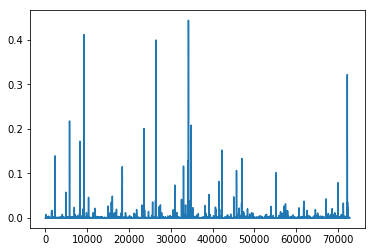

In [19]:
#il grafico mostra la distribuzione dei pesi delle authority

plt.plot(myarray)
plt.show()

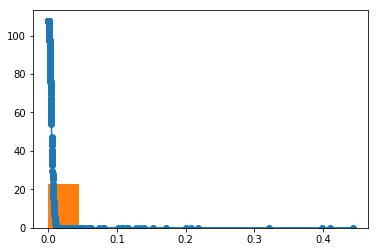

In [20]:
h=sorted(myarray)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

plt.plot(h,fit,'-o')

plt.hist(h,normed=True)      #use this to draw histogram of your data

plt.show() 

In [21]:
#otteniamo il numero ottimale di bin applicando la regola di Sturge (1+(3.322*log(N)))

nbin=1+3.322*(math.log(len(myarray)))

In [22]:
nbin=int(nbin)

In [23]:
nbin

38

In [24]:
index = range(1,72813)
columns = ['auth']


# Option 1: Set the column names in the structured array's dtype 

dtype = [('a','float32')]
values = myarray
df = pd.DataFrame(values, index=index)

In [25]:
#viene aggiunta una colonna 'binned' per indicare il numero di bin a cui la serp appartiene

df['binned'] = pd.cut(df[0], nbin,labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38])

In [26]:
df['binned'].unique()

[1, 2, 12, 5, 19, ..., 38, 8, 14, 9, 28]
Length: 20
Categories (20, int64): [1 < 2 < 3 < 4 ... 28 < 35 < 36 < 38]

In [27]:
df['serps'] = set_s

In [28]:
df.loc[df['binned'] == 1].describe()

,0
count,72735.000000
mean,0.000038
std,0.000299
min,0.000000
25%,0.000001
50%,0.000003
75%,0.000011
max,0.011634


In [29]:
#Dizionario di dizionari
#KEY: bin index   VALUE: Dizionario SERP,KEYWORDS
index_serps = {}

#Dizionario contenete l'intersezione delle keyword collegate a serp appartenenti allo stesso cluster
#KEY: bin index   VALUE: Keywords intersection
index_key_set = {}

for i in range(2,39):
    start_time = time.time()
    if(not df.loc[df['binned'] == i].empty):
        df_t = df.loc[df['binned'] == i]
        key_serp = {}
        list_key = []
        for row in df_t.itertuples(index=True, name='Pandas'):
            serp = row.serps
            
            #considera solo le keyword che si trovano nelle prime 5 posizioni per poter caratterizzare la serp relativa come top site
            df_k = graph.loc[graph['SERP']== serp].loc[graph['POSITION'] >= 0.6] 
            
            #lista contenente i set delle keyword per ogni set, utilizzata successivamente per ottenere l'intersezione
            list_key.append(set(df_k['KEYWORD']))
            key_serp[serp] = set(df_k['KEYWORD'])
        
        #per ogni bin i contiene la coppia serp,keywords
        index_serps[i] = key_serp 
        
        #contiene l'intersezione delle keyword relative al bin i
        index_key_set[i] = set.intersection(*list_key) 
        
    print("Iterazione " , i ,"  --- %s seconds ---" % (time.time() - start_time))

Iterazione  2   --- 4.801159381866455 seconds ---
Iterazione  3   --- 2.422520160675049 seconds ---
Iterazione  4   --- 1.3005211353302002 seconds ---
Iterazione  5   --- 0.6632258892059326 seconds ---
Iterazione  6   --- 0.16655468940734863 seconds ---
Iterazione  7   --- 0.35205793380737305 seconds ---
Iterazione  8   --- 0.16655182838439941 seconds ---
Iterazione  9   --- 0.17752504348754883 seconds ---
Iterazione  10   --- 0.6851677894592285 seconds ---
Iterazione  11   --- 0.17154145240783691 seconds ---
Iterazione  12   --- 0.3510608673095703 seconds ---
Iterazione  13   --- 0.000997781753540039 seconds ---
Iterazione  14   --- 0.17253804206848145 seconds ---
Iterazione  15   --- 0.18052268028259277 seconds ---
Iterazione  16   --- 0.0 seconds ---
Iterazione  17   --- 0.0009980201721191406 seconds ---
Iterazione  18   --- 0.37699103355407715 seconds ---
Iterazione  19   --- 0.1825118064880371 seconds ---
Iterazione  20   --- 0.0009980201721191406 seconds ---
Iterazione  21   --- 

In [31]:
str(index_serps.keys())

'dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 19, 28, 35, 36, 38])'

In [ ]:
df.loc[df['binned'] == 38].describe()

In [32]:
for i in list(index_serps.keys()):
    print("BIN: ", i)
    print("SERPS: ", list(index_serps[i].keys()))
    print("N.KEYWORDS: ", len(index_key_set[i]))
    print("-------------------------------------------------------------------------")

BIN:  2
SERPS:  ['lastampa.it', 'tripadvisor.it', 'saporie.com', 'cucina-naturale.it', 'star.it', 'scattidigusto.it', 'video.mediaset.it', 'wikihow.it', 'dissapore.com', 'leitv.it', 'moovenda.com', 'foodora.it', 'mangiarebene.com', 'sicilianicreativiincucina.it', 'chiarapassion.com', 'lacuochinasopraffina.com', 'finedininglovers.it', 'parmalat.it', 'tv2000.it', 'donnamoderna.com', 'piattoforte.it', 'foodnetwork.it', 'vegolosi.it', 'nonsprecare.it', 'lospicchiodaglio.it', 'hovogliadidolce.it', 'gnamgnam.it', 'ilgiornaledelcibo.it', 'ricettedalmondo.it']
N.KEYWORDS:  0
-------------------------------------------------------------------------
BIN:  3
SERPS:  ['la.repubblica.it', 'foxlife.it', 'oggi.it', 'soniaperonaci.it', 'academiabarilla.it', 'deliveroo.it', 'elle.com', 'fattoincasadabenedetta.it', 'blog.cookaround.com', 'alice.tv', 'primochef.it', 'guidecucina.pianetadonna.it', 'grazia.it', 'tavolartegusto.it', 'facebook.com']
N.KEYWORDS:  0
--------------------------------------------

In [33]:
list_index = [6,7,8,9,11,12,14,14,19,28,35,36,38]

In [ ]:
for i in list_index:
    for j in list_index:
        if(i != j):
            print("KEY IN COMUNE TRA ",i,"(",len(index_key_set[i]),")"," E ", j,"(",len(index_key_set[j]),")")
            print(len(index_key_set[i].intersection(index_key_set[j])),"\n")


In [ ]:
#             print("KEY IN COMUNE TRA ",i,"(",len(index_key_set[i]),")"," E ", j,"(",len(index_key_set[j]),")")
#             print(len(index_key_set[i].intersection(index_key_set[j])),"\n")

In [ ]:
#scrive in diversi file csv la lista di keyword raggruppate per ogni bin

for i in list(index_serps.keys()):
    path =  "Clusters/ListKeywordsForBin_"
    est = ".csv"
    csvFilename = (path+str(i)+est)  # what name you want to save your csv as
    csv = open(csvFilename, "w", encoding = "utf-8")  # create or open csv, "w" to write strings
    csv.write('')
    for elem in index_key_set[i]:
        csv.write(elem + "\n")

In [ ]:
str_111419 = ("misya.info buttalapasta.it youtube.com cookaround.com")

In [ ]:
lst_key_index_111419 = []
set_111419 = index_key_set[11].intersection(index_key_set[14]).intersection(index_key_set[19])
len(set_111419)

j = 0
for elem in set_111419:
    if(j<=15):
        line = (str_111419.upper()+","+elem)
        lst_key_index_111419.append(line)
        j = j+1

In [ ]:
#csv contenente l'intersezione tra le keyword appartenenti ai bin 10,11,13

csvFilename = "graphSample_111419.csv"
csv = open(csvFilename, "w", encoding = "utf-8")  # create or open csv, "w" to write strings
csv.write('')
for elem in lst_key_index_111419:
        csv.write(elem + "\n") 

In [ ]:
#dizionario serps / keywords
#KEY: serps di ogni bin ottenuto  VALUE: keywords in comune tra le serp di ogni bin

serps_conctn = {}
for i in list_index:
    serps_conctn[i] = ""
    for elem in list(index_serps[i].keys()):
        if(serps_conctn[i] == ""):
            serps_conctn[i] = (elem+" ")
        else:
            serps_conctn[i] = (serps_conctn[i]+elem+" ")

In [ ]:
serps_conctn

In [ ]:
#crea una lista serps,keywords al fine di realizzare un sample del grafo per la visualizzazione

lst_key_index = []
for i in list_index:
    j = 0
    for elem in index_key_set[i]:
        if(j<=20):
            line = (serps_conctn[i]+","+elem)
            lst_key_index.append(line)
            j = j+1

In [ ]:
csvFilename = "graphSample.csv"
csv = open(csvFilename, "w", encoding = "utf-8")  # create or open csv, "w" to write strings
csv.write('')
for elem in lst_key_index:
        csv.write(elem + "\n") 

In [91]:
g_volumes = pd.read_csv('gtrends_estimates.csv', sep='\t', header=None, encoding='utf-8', engine='python')

In [92]:
g_volumes = g_volumes.rename(columns={0:'KEYWORD',1:'VOLUME'})

In [93]:
gv_dict = {}

In [94]:
for row in g_volumes.itertuples(index=True, name='Pandas'):
    gv_dict[row.KEYWORD] = row.VOLUME

In [114]:
#Dizionario di dizionari
#KEY: bin index   VALUE: Dizionario KEYWORDS,VOLUME

bin_volume = {}
bin_list_volume = {}

In [115]:
for i in list_index:
    key_volume = {}
    for elem in index_key_set[i]:
        if(elem in gv_dict.keys()):
            key_volume[elem] = gv_dict[elem]
    key_volume_ord = sorted(key_volume.items(), key=lambda x: x[1], reverse=True)  #ordina il dizionario secondo i valori in modo decrescente
    bin_volume[i] = key_volume
    bin_list_volume[i] = key_volume_ord

In [116]:
import statistics

for j in list_index:
    numbers = [bin_volume[j][key] for key in bin_volume[j]]
    mean_ = statistics.mean(numbers)
    print("BIN: ", j, " MEDIA VOLUMI: ",mean_)

BIN:  6  MEDIA VOLUMI:  29.174222020236865
BIN:  7  MEDIA VOLUMI:  3.7072945912126887
BIN:  8  MEDIA VOLUMI:  137.371822404785
BIN:  9  MEDIA VOLUMI:  37.61152648314722
BIN:  11  MEDIA VOLUMI:  167.1084359693751
BIN:  12  MEDIA VOLUMI:  41.121016468373895
BIN:  14  MEDIA VOLUMI:  24.15173157857722
BIN:  14  MEDIA VOLUMI:  24.15173157857722
BIN:  19  MEDIA VOLUMI:  49.06091270126663
BIN:  28  MEDIA VOLUMI:  117.99230285460274
BIN:  35  MEDIA VOLUMI:  48.746811410806444
BIN:  36  MEDIA VOLUMI:  76.62677710357323
BIN:  38  MEDIA VOLUMI:  109.36647909719261


In [124]:
for i in list(bin_list_volume.keys()):
    path =  "Clusters/top100volume_"
    est = ".csv"
    csvFilename = (path+str(i)+est)  # what name you want to save your csv as
    csv = open(csvFilename, "w", encoding = "utf-8")  # create or open csv, "w" to write strings
    csv.write('')
    k = 0
    for elem in bin_list_volume[i]:
        if(k<=100):
            csv.write(str(elem) + "\n")
            k = k+1

In [127]:
csvFilename = ("Clusters/top100volume_38.csv")
csv = open(csvFilename, "w", encoding = "utf-8")  # create or open csv, "w" to write strings
csv.write('')
for elem in bin_list_volume[38][0:100]:
    csv.write(str(elem) + "\n")